In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

sns.set()


# Gaussian distribution


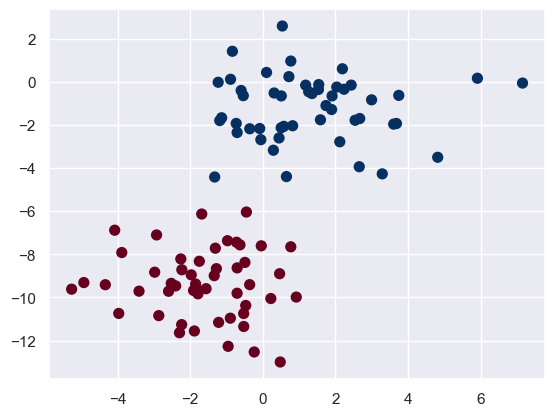

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")


In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)

rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
y_new = model.predict(X_new)

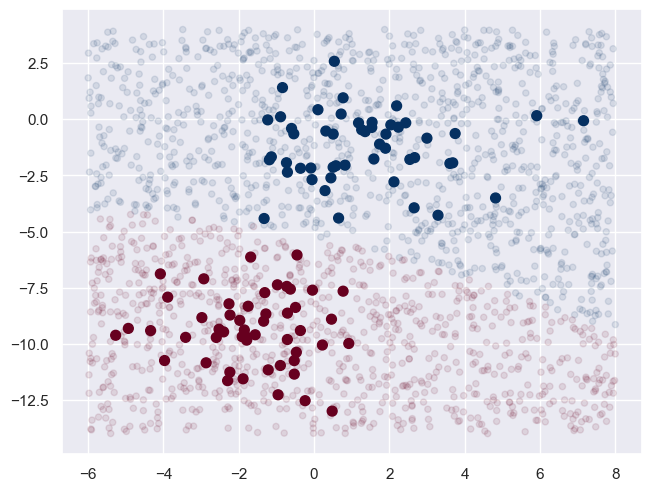

In [8]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")
ax.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, cmap="RdBu", alpha=0.1)


In [9]:
yprob = model.predict_proba(X_new)
yprob[-8:].round(2)


array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial distribution


In [10]:
from sklearn.datasets import fetch_20newsgroups


In [11]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
categories = [
    "talk.religion.misc",
    "soc.religion.christian",
    "sci.space",
    "comp.graphics",
]
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)


In [13]:
print(train.data[8])


From: dan@Ingres.COM (a Rose arose)
Subject: Re: Christian Extremist Kills Doctor
Organization: Representing my own views here only.
X-Newsreader: Tin 1.1 PL3
Distribution: usa
Lines: 97

regard@hpsdde.sdd.hp.com (Adrienne Regard) writes:
: In article <1993Mar30.001428.7648@pony.Ingres.COM> dan@Ingres.COM (a Rose arose) writes:
: 
: Seriously, though, Griffen didn't save the lives of children, and he did
: destroy the life of a man, so on the most superficial of levels, he's scum.
: 

I almost agree, but Griffen is not scum.  Scum has no guilt or freedom to
choose anything.  Griffen does.  God did not make scum when he made Griffen.
He made a precious person and this person chose to do wrong.  The same goes
for Dr. Gunn.

: But if you are to examine it more closely, Griffen would have preferred that
: these children were born -- yet AFTER their birth, did Griffen have any 
: assistance to offer them?  Did Griffen intend to support them, educate them,
: raise them up to be useful citize

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mat = confusion_matrix(test.target, labels)

Text(110.44999999999996, 0.5, 'predicted label')

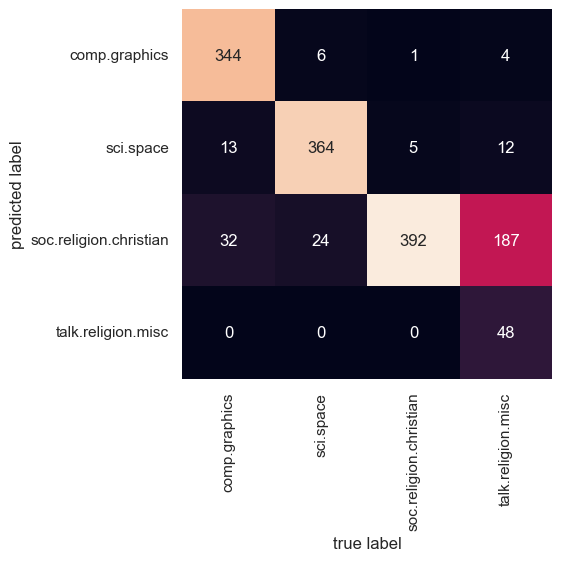

In [29]:
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=train.target_names,
    yticklabels=train.target_names,
)

plt.xlabel("true label")
plt.ylabel("predicted label")